# Machine Learning Pipeline with Python

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Today, we wil be learning data input, data cleaning, pre-processing, model taining, deployment.

In [ ]:
source = 'wine_quality.csv'
wine_data = pd.read_csv(source, delimiter = ';')

wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


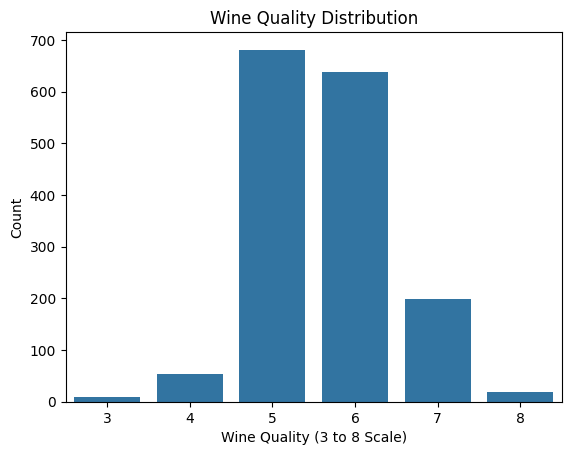

In [ ]:
sns.countplot(x = 'quality', data = wine_data)
plt.title('Wine Quality Distribution')
plt.xlabel('Wine Quality (3 to 8 Scale)')
plt.ylabel('Count')
plt.show()

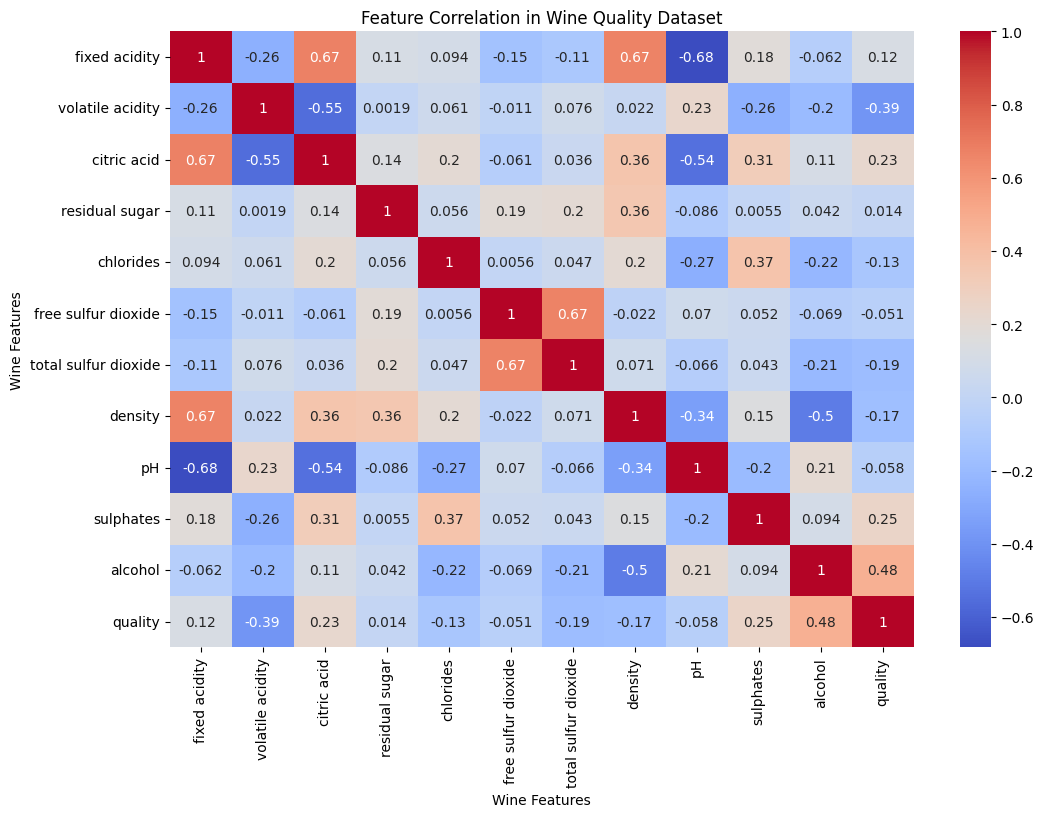

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(wine_data.corr(), annot = True, cmap = 'coolwarm')

plt.title('Feature Correlation in Wine Quality Dataset')
plt.xlabel('Wine Features')
plt.ylabel('Wine Features')

plt.show()

**Shows how important the features are.**

Red = Most correlation

For instance, total sulfure dioxide is related to free sulfur dioxide.

## Data Processing

Training data shape: (1279, 11)
Testing data shape: (320, 11)


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


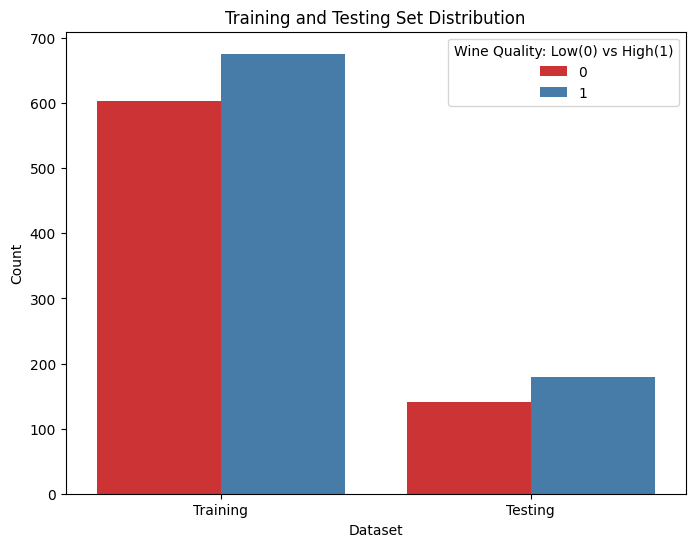

In [ ]:
# wine_data['quality_binary'] = (wine_data['quality'] > 5).astype(int)

# wine_data = wine_data.drop(columns = ['quality'])

X = wine_data.drop(columns=['quality_binary'])
y = wine_data['quality_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

train_test_df = pd.DataFrame({
    'Set': ['Training'] * len(y_train) + ['Testing'] * len(y_test),
    'Target': pd.concat([y_train, y_test])
})

plt.figure(figsize = (8,6))
sns.countplot(x = 'Set', hue = 'Target', data = train_test_df, palette = 'Set1')
plt.title('Training and Testing Set Distribution')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.legend(title = 'Wine Quality: Low(0) vs High(1)')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

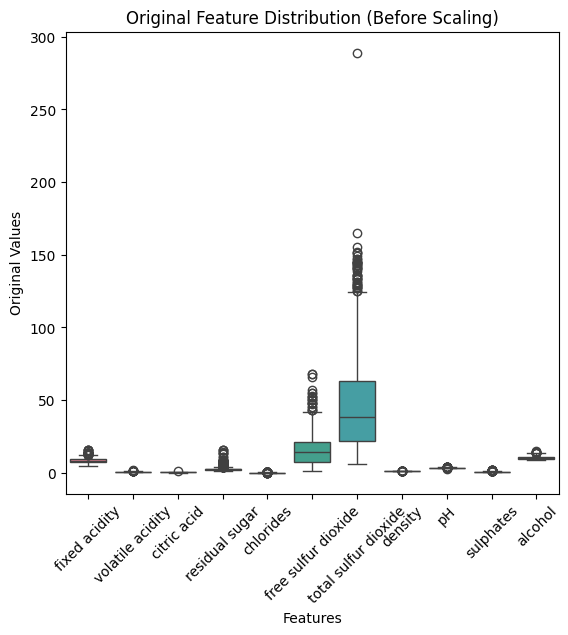

In [ ]:
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data = X_train)
plt.title('Original Feature Distribution (Before Scaling)')
plt.xlabel('Features')
plt.ylabel('Original Values')

plt.xticks(ticks = np.arange(len(X_train.columns)), labels = X_train.columns, rotation = 45)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

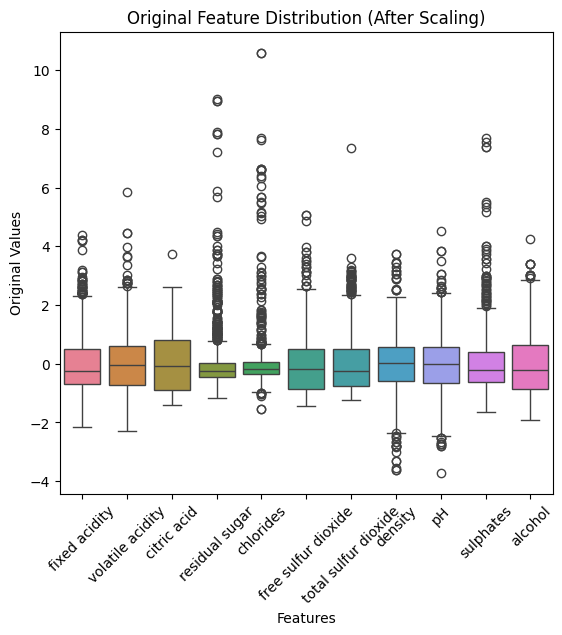

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data = X_train_scaled)
plt.title('Original Feature Distribution (After Scaling)')
plt.xlabel('Features')
plt.ylabel('Original Values')

plt.xticks(ticks = np.arange(len(X_train.columns)), labels = X_train.columns, rotation = 45)
plt.show()

## Logistic Regression

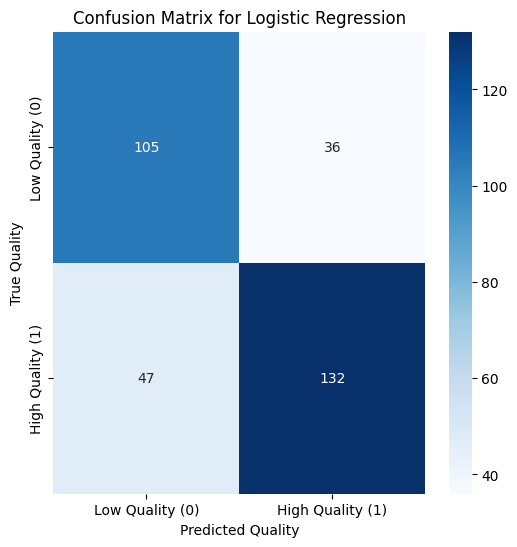

In [ ]:
log_reg_params = {'C': [0.01, 0.1, 1, 10, 100]} # define parameters for a hyper... cross validating a model to ensure its accurate
log_reg = GridSearchCV(LogisticRegression(random_state = 42), log_reg_params, cv = 5) #tune the hyperparams to ensure accrate
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled) #confusion matrix

plt.figure(figsize = (6,6))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Quality')
plt.ylabel('True Quality')
plt.xticks([0.5, 1.5], ['Low Quality (0)', 'High Quality (1)'])
plt.yticks([0.5, 1.5], ['Low Quality (0)', 'High Quality (1)'])
plt.show()

Model predicts 132 rows of high quality and it is correct. correct for 132 times.

36 rows thiught to be of high quality is actually low quality.

36 n 47 are wrong predictions. 105 and 132 are correct predictions

105 is TN
36 is FP
47 FN
132 TP



## KNN

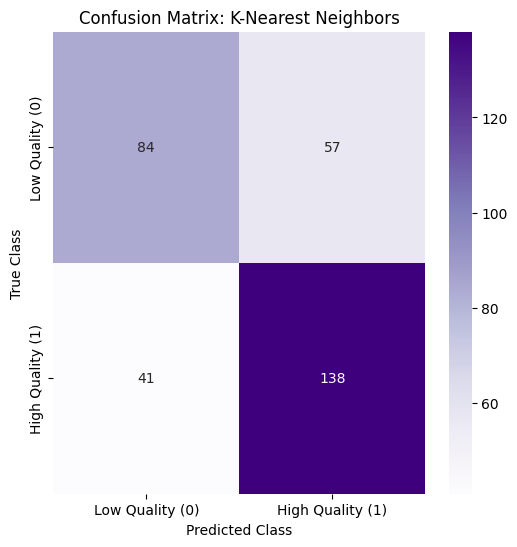

In [ ]:
knn_params = {'n_neighbors': [3, 5, 7, 9]}

knn_clf = GridSearchCV(KNeighborsClassifier(), knn_params, cv = 5)

knn_clf.fit(X_train_scaled, y_train)

y_pred_knn = knn_clf.predict(X_test_scaled)

plt.figure(figsize = (6, 6))

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot = True, fmt = 'd', cmap = 'Purples')

plt.title('Confusion Matrix: K-Nearest Neighbors')

plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.xticks([0.5, 1.5], ['Low Quality (0)', 'High Quality (1)'])
plt.yticks([0.5, 1.5], ['Low Quality (0)', 'High Quality (1)'])

plt.show()

To show how close the ...

disadv: comparing pts to others near it - slow for large datasets.

## Decision Tree

Starts w a node, then branches out to other nodes.
highest weight that contribute to a high or low quality one

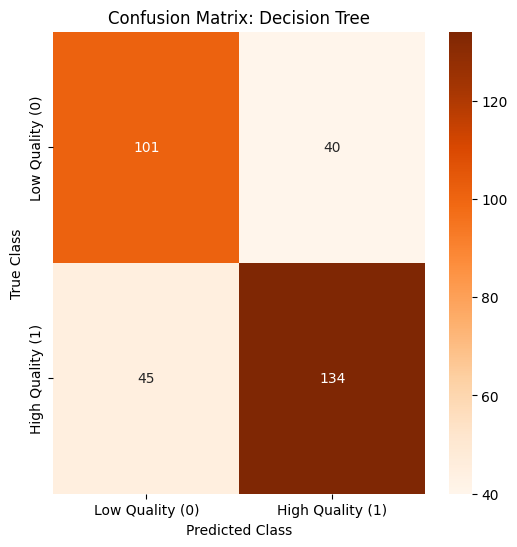

In [ ]:
# start w hyperparameter, can state how deep you want it to go (esp impt for large datasets)

# Define depth of decision tree
dt_params = {'max_depth': [None, 5, 10, 20]}

dt_clf = GridSearchCV(DecisionTreeClassifier(random_state = 42), dt_params, cv = 5)

dt_clf.fit(X_train, y_train)

# assign a variable to predict
y_pred_dt = dt_clf.predict(X_test)

plt.figure(figsize = (6, 6))

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot = True, fmt = 'd', cmap = 'Oranges')

plt.title('Confusion Matrix: Decision Tree')

plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.xticks([0.5, 1.5], ['Low Quality (0)', 'High Quality (1)'])
plt.yticks([0.5, 1.5], ['Low Quality (0)', 'High Quality (1)'])

plt.show()

## Random Forest

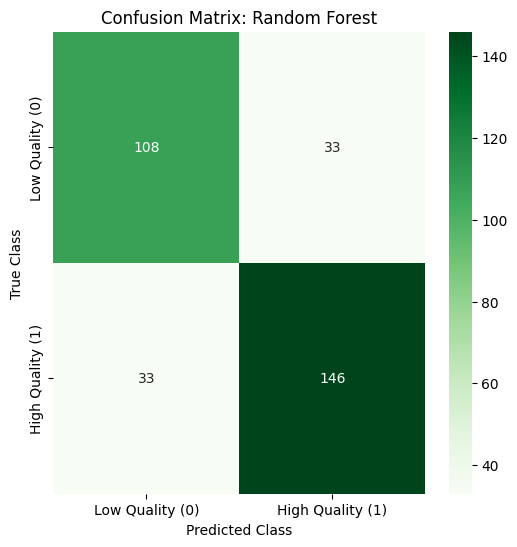

In [ ]:
# Random forest parameters
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}

rf_clf = GridSearchCV(RandomForestClassifier(random_state = 42), dt_params, cv = 5)

rf_clf.fit(X_train, y_train)

# assign a variable to predict
y_pred_rf = rf_clf.predict(X_test)

plt.figure(figsize = (6, 6))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot = True, fmt = 'd', cmap = 'Greens')

plt.title('Confusion Matrix: Random Forest')

plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.xticks([0.5, 1.5], ['Low Quality (0)', 'High Quality (1)'])
plt.yticks([0.5, 1.5], ['Low Quality (0)', 'High Quality (1)'])

plt.show()

# Model Comparison

In [ ]:
from sklearn.metrics import precision_score, recall_score

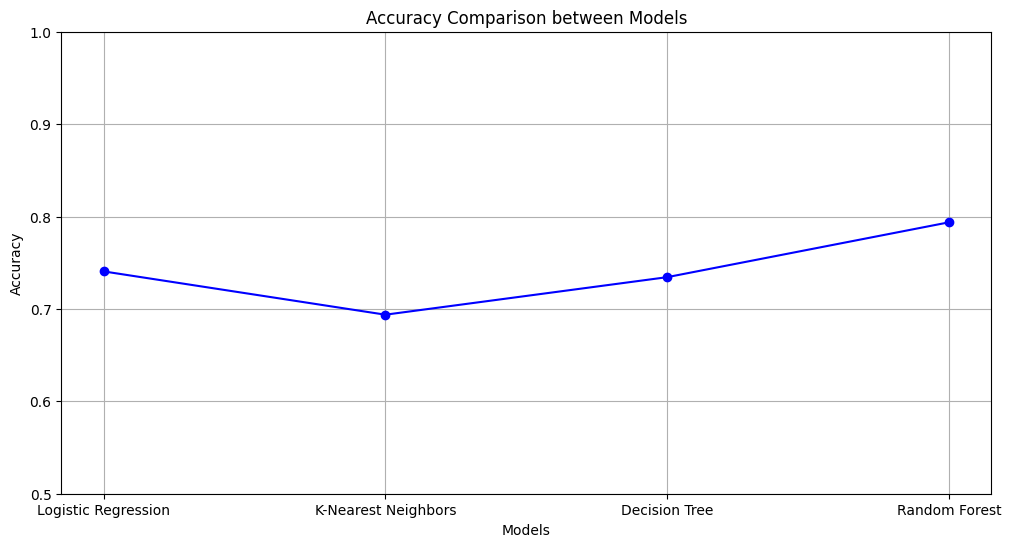

In [ ]:
# model names
model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest']

#calculate accuracy, precision and recall

accuracies = [
    accuracy_score(y_test, y_pred_log_reg),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf)
]

precisions = [
    precision_score(y_test, y_pred_log_reg),
    precision_score(y_test, y_pred_knn),
    precision_score(y_test, y_pred_dt),
    precision_score(y_test, y_pred_rf)
]

recalls = [
    recall_score(y_test, y_pred_log_reg),
    recall_score(y_test, y_pred_knn),
    recall_score(y_test, y_pred_dt),
    recall_score(y_test, y_pred_rf)
]

# visualise model performance
plt.figure(figsize = (12, 6))
plt.plot(model_names, accuracies, marker = 'o', linestyle = '-', color = 'b', label = 'Accuracy')
plt.title('Accuracy Comparison between Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.ylim([0.5, 1])
plt.grid(True)
plt.show()

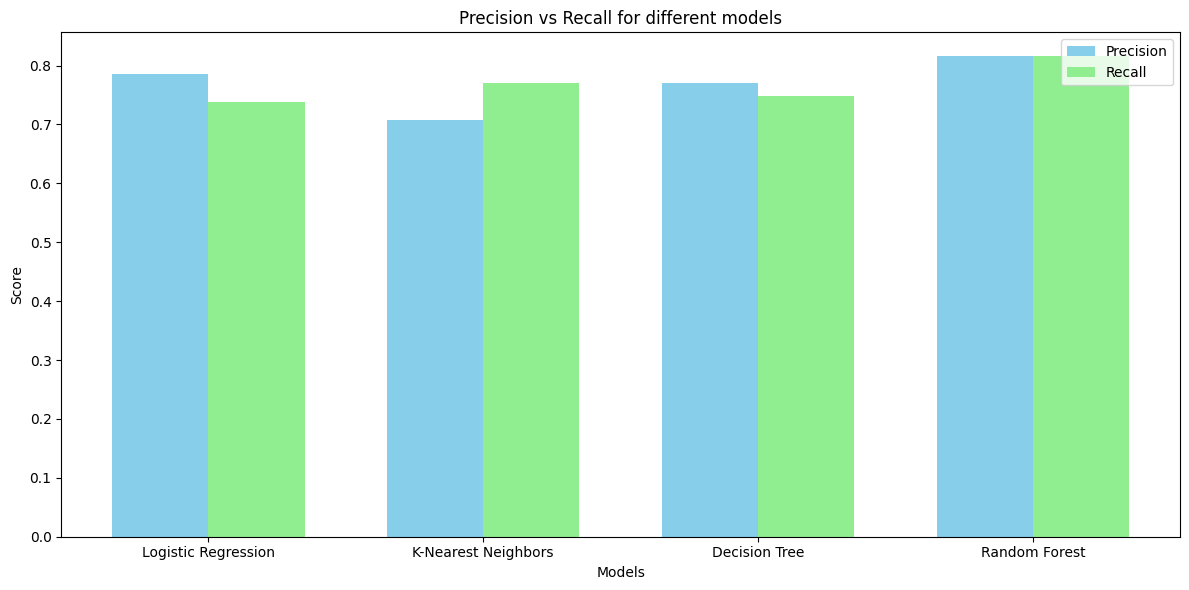

In [ ]:
# Precision vs Recall Comparison of Models

plt.figure(figsize = (12, 6))
bar_width = 0.35
index = np.arange(len(model_names))

# plotting the precision
plt.bar(index, precisions, bar_width, label = 'Precision', color = 'skyblue')

# plotting the recall
plt.bar(index + bar_width, recalls, bar_width, label = "Recall", color = 'lightgreen')

plt.title('Precision vs Recall for different models')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(index + bar_width/2, model_names)
plt.legend()

plt.tight_layout()
plt.show()